# Reducción de dimensionalidad con PCA

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [39]:
iris = sns.load_dataset("iris")

# Escalamos los datos
sclaler = StandardScaler()
sclaled = sclaler.fit_transform(
  iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
)

## PCA con `numpy`

In [40]:

# Creamos la matriz de covarianza
covariance_matrix = np.cov(sclaled.T)
covariance_matrix

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

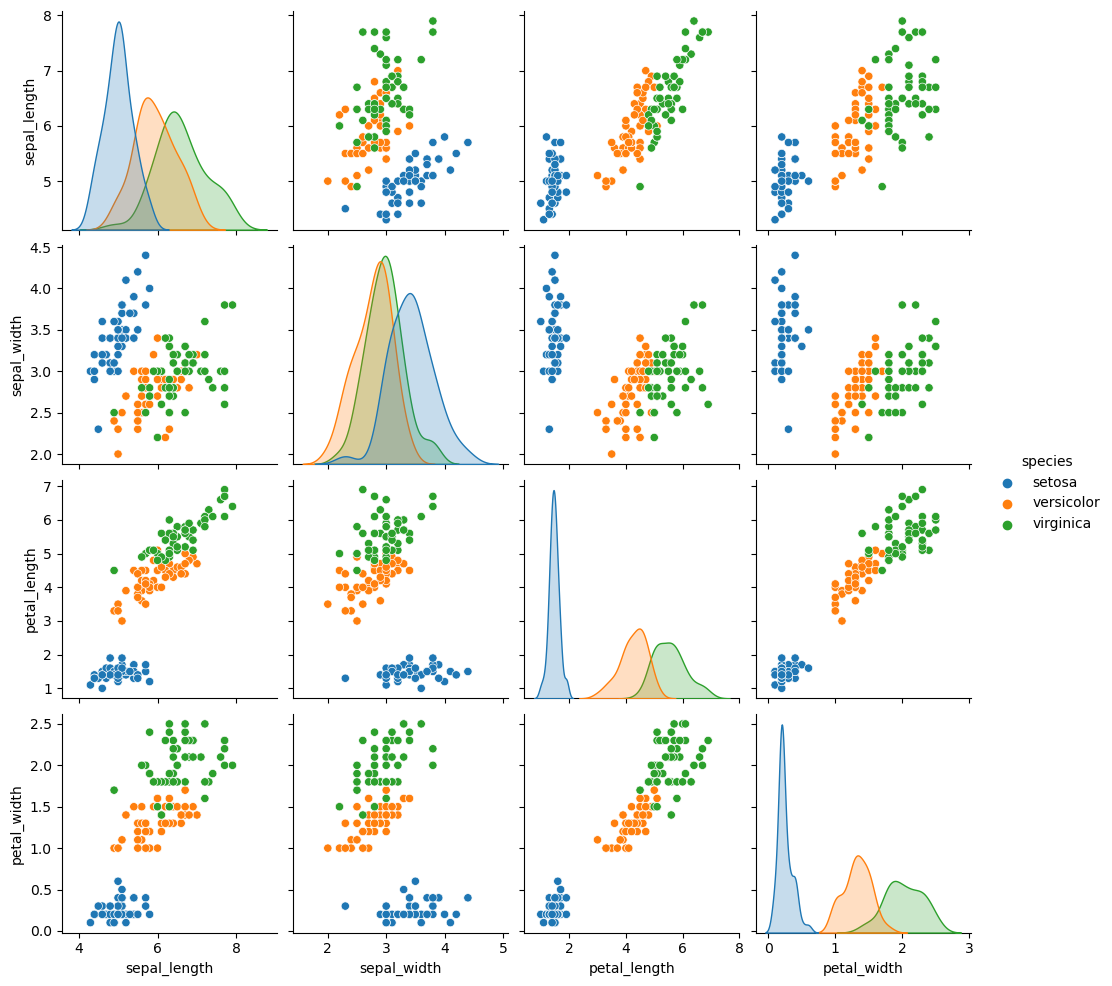

In [33]:
sns.pairplot(iris, hue="species")
plt.show()

Del los diagramas anteriores a simple vista se aprecia una correlación entre el ancho del petalo (petal_width) y el largo del petalo (petal_length).
<br>
Creamos una visualización solo para esas vairables.

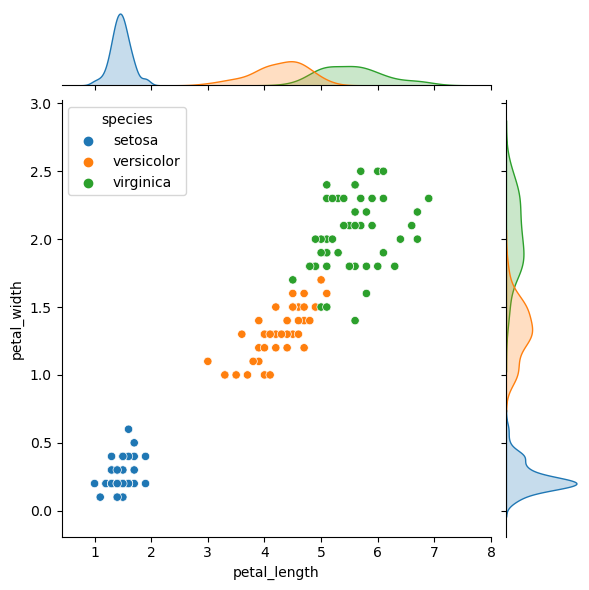

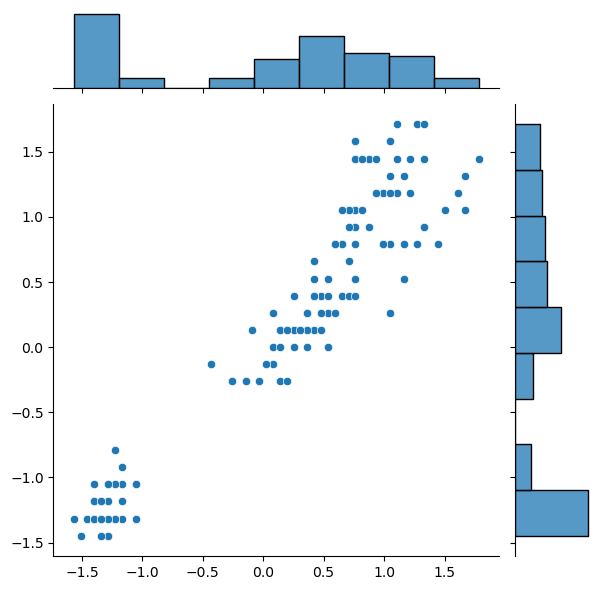

In [34]:
sns.jointplot(x=iris["petal_length"], y=iris["petal_width"], hue=iris["species"])

# valores escalados
sns.jointplot(x=sclaled[:, 2], y=sclaled[:, 3])
plt.show()

Descomposicin en vectores y valores propios
https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html

In [35]:
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

Los valores y vectores propios captura la mayor varianza de los datos.

En `eigen_values` obtenemos un arreglo de 4 valores (la matriz de covarianza de es de 4x4)

In [36]:
print(f"Valores propios: {eigen_values}")
print(f"Vectores propios: {eigen_vectors}")

Valores propios: [2.93808505 0.9201649  0.14774182 0.02085386]
Vectores propios: [[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


Cada vector propio que obtenemos al descomponer la matriz, es una dirección principal en la cual vamos a capturar la mayor cantidad de varianza de los datos originales.


Explicación de los valors propios en terminos de la varianza

In [37]:
variance_list = []

for i in eigen_values:
  # La relación del valor propio entre la suma de los valores dentro del arreglo,
  # explica la varianza que representa (captura) cada valor propio
  variance_list.append(i/sum(eigen_values)*100)

print(variance_list)

[72.96244541329987, 22.85076178670177, 3.6689218892828683, 0.5178709107154885]


Del resultado antereior, observamos que el primer componente captura el 72.96% de los datos, el segundo captura el 22.85%, mientras que los dos últimos solo un 3.67% y 0.51%.
<br>
Esto nos puede decir a simple vista que el compoenente cuatro puede ser descartado por la baja varianza que abarca, menos del 1%.

## PCA con `sklearn`

In [41]:
from sklearn.decomposition import PCA

 # Reducción de los datos a solo 2 componentes
pca = PCA(n_components=2)
pca.fit(sclaled)

PCA(n_components=2)

Varianza explicada por cada componentes, en este caso seran 2, como lo inicamos al crear la instancia `pca`

In [42]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

La priopiedad `explained_variance_ratio_` nos dices que los dos componentes que obtuvo de los datos escalados fue del 72.96% en el primero y 22.85% en el segundo, ambos son los que capturan más varianza.

## Reducción

In [47]:
reduced_scaled = pca.transform(sclaled)

print(f"sclaled: {sclaled.shape}")
print(f"reduced: {reduced_scaled.shape}")

sclaled: (150, 4)
reduced: (150, 2)


En `reduces_scaled` almacenamos los valores reducidos con el método `transform` el cuál dejo con solo dos componentes a `data point` de los datos escalados.

In [52]:
iris["pca_1"], iris["pca_2"]  = reduced_scaled[:,0], reduced_scaled[:,1]
iris.head()


sepal_length  sepal_width  petal_length  petal_width species     pca_1  \
0           5.1          3.5           1.4          0.2  setosa -2.264703   
1           4.9          3.0           1.4          0.2  setosa -2.080961   
2           4.7          3.2           1.3          0.2  setosa -2.364229   
3           4.6          3.1           1.5          0.2  setosa -2.299384   
4           5.0          3.6           1.4          0.2  setosa -2.389842   

      pca_2  
0  0.480027  
1 -0.674134  
2 -0.341908  
3 -0.597395  
4  0.646835

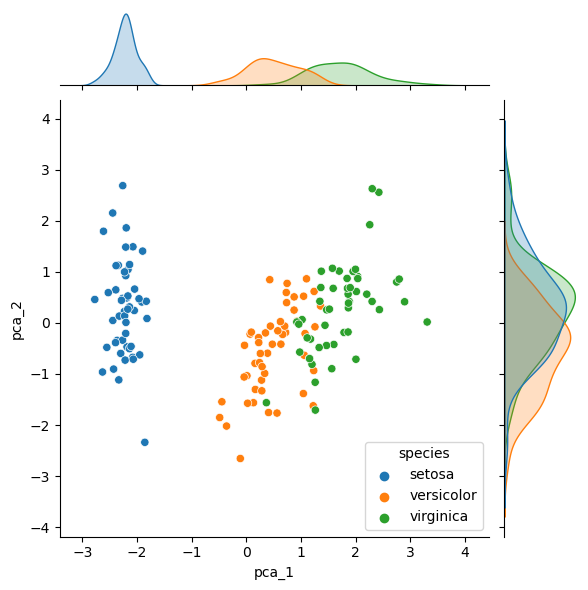

In [54]:
sns.jointplot(x=iris["pca_1"], y=iris["pca_2"], hue=iris["species"])
plt.show()

Gráfico de las dimensiones reducidas, el scatter plot esta contemplando el 95% de la varianza de los datos.